In [9]:
!pip install yfinance


In [10]:
import yfinance as yf

In [11]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

In [12]:
stock = "GOOG"
google_data = yf.download(stock , start , end)

[*********************100%***********************]  1 of 1 completed


In [13]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-20,25.402758,26.016573,25.335442,25.970697,25.907074,52150788
2014-10-21,26.187601,26.267384,25.884434,26.254917,26.190598,46725935
2014-10-22,26.421959,26.916101,26.367607,26.562572,26.497499,58385859
2014-10-23,26.892168,27.286085,26.719143,27.124531,27.058081,46976621
2014-10-24,27.143478,27.169407,26.716150,26.915106,26.849169,39462046


# google_data.shape

In [14]:
google_data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-10-20   25.402758   26.016573   25.335442   25.970697   25.907074   
2014-10-21   26.187601   26.267384   25.884434   26.254917   26.190598   
2014-10-22   26.421959   26.916101   26.367607   26.562572   26.497499   
2014-10-23   26.892168   27.286085   26.719143   27.124531   27.058081   
2014-10-24   27.143478   27.169407   26.716150   26.915106   26.849169   
...                ...         ...         ...         ...         ...   
2024-10-14  164.910004  167.619995  164.779999  166.350006  166.350006   
2024-10-15  167.139999  169.089996  166.050003  166.899994  166.899994   
2024-10-16  166.029999  167.279999  165.216003  166.740005  166.740005   
2024-10-17  167.380005  167.929993  164.369995  164.509995  164.509995   
2024-10-18  164.869995  166.369995  164.750000  165.050003  165.050003   

   

In [15]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-10-20 to 2024-10-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


In [16]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [2]:
!pip install matplotlib

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

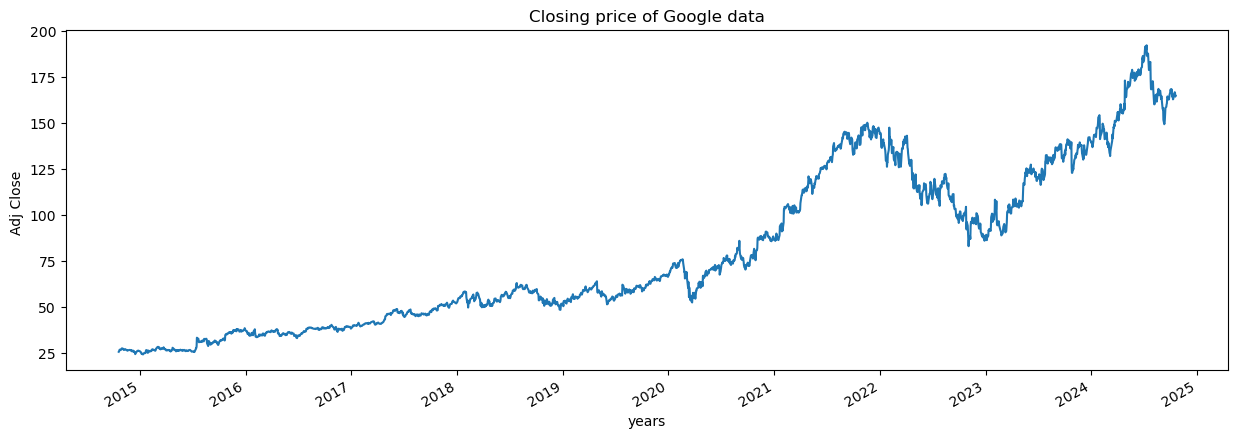

In [18]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close ")
plt.title("Closing price of Google data")

In [19]:
def plot_graph(figsize , values , column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name}of Google data")

In [20]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

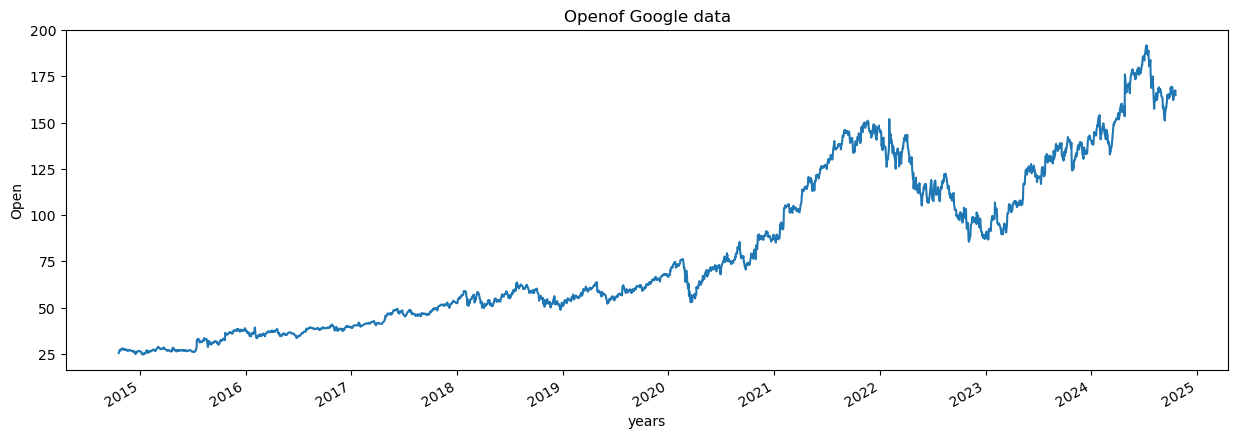

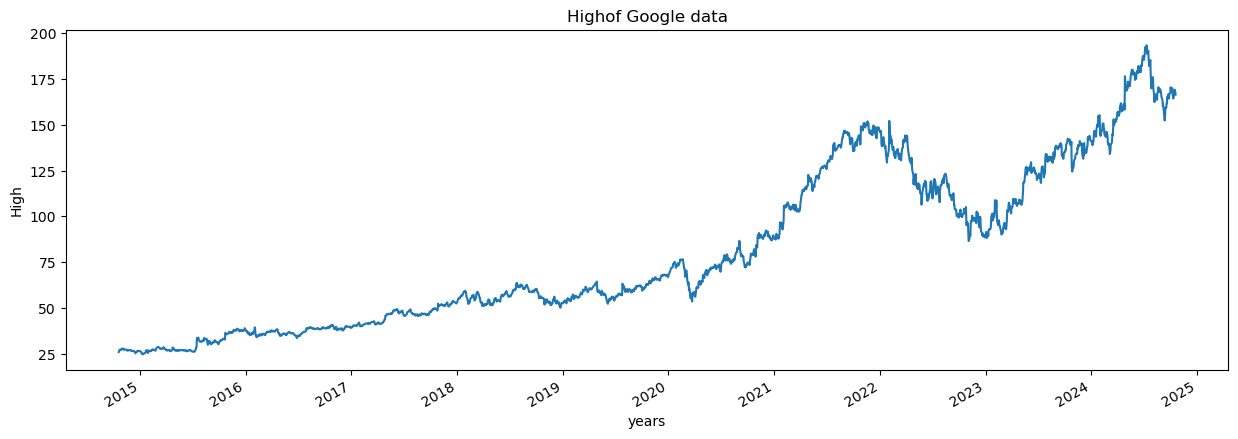

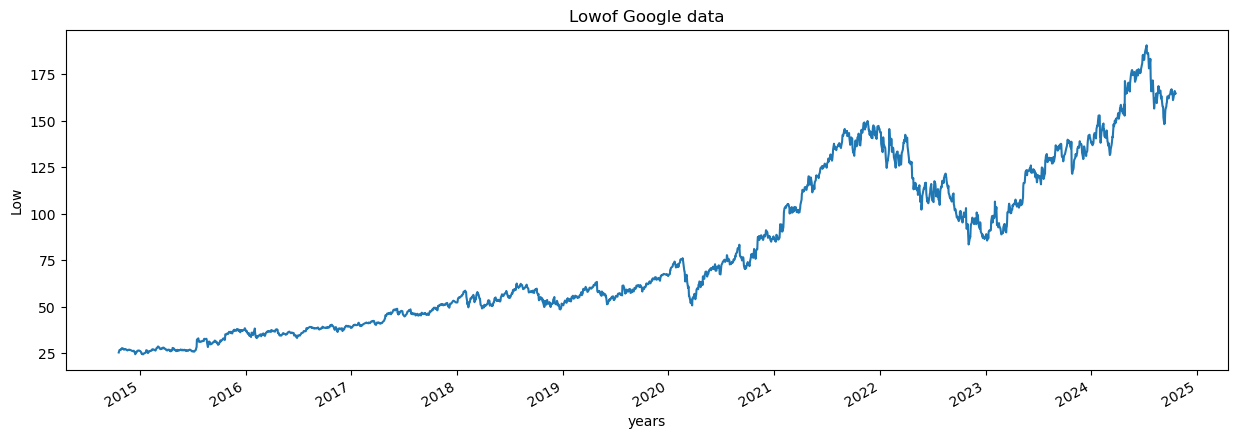

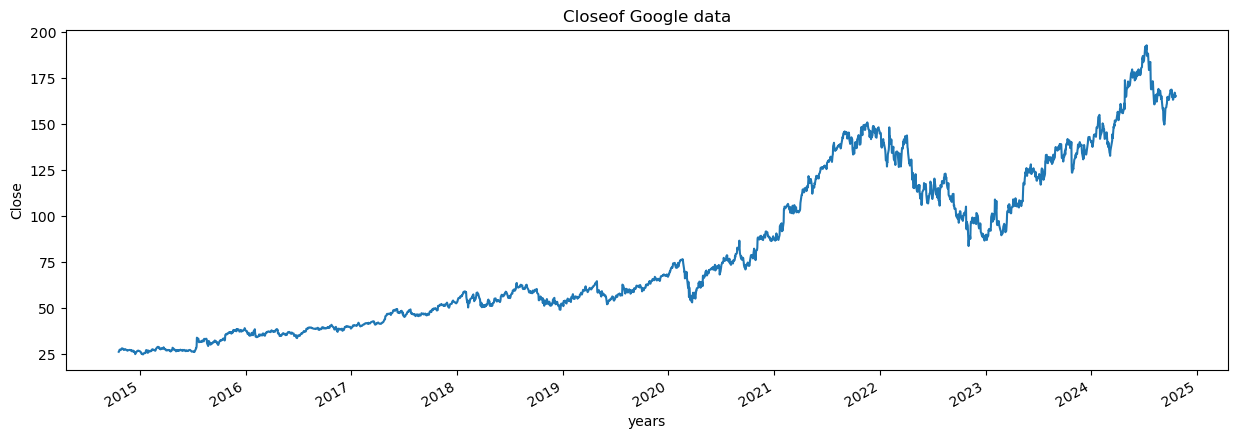

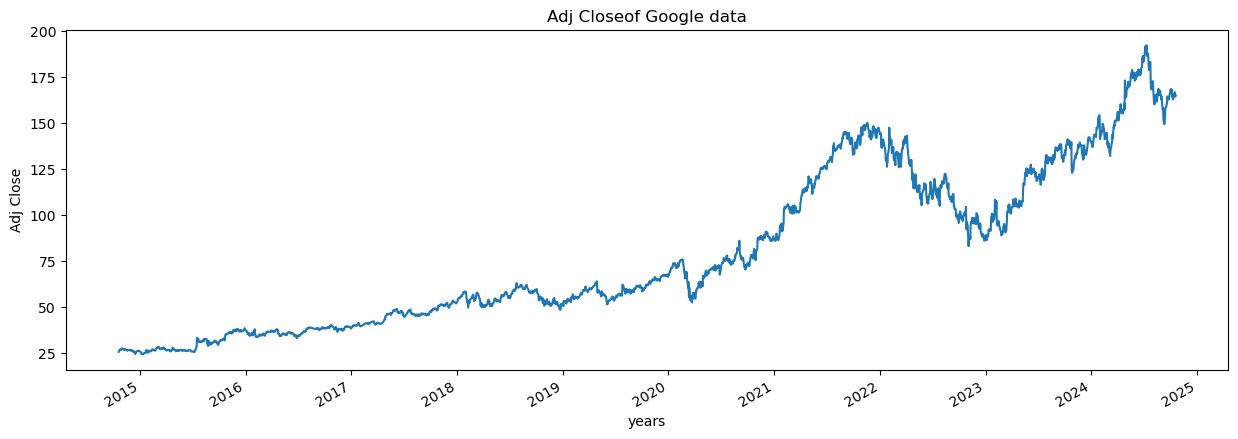

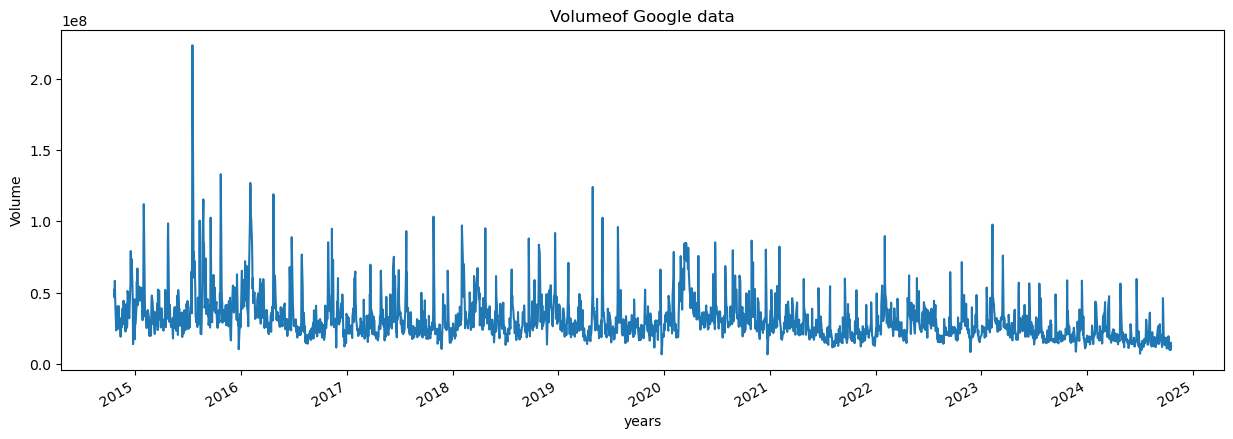

In [21]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

In [22]:
#10, 20, 30, 40, 50, 60, 70, 80, 90, 100
#MA for 5 days ==> null[] null[] null[] 30 40 50 60 70 80

In [23]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[5:6])/5)

12.0


In [3]:
!pip install pandas

In [24]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [25]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [26]:
for i in range(2004, 2025):
    print(i, list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 51
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 202


In [27]:
google_data['MA_for_250_days']=google_data['Adj Close'].rolling(250).mean()

In [28]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-10-09          NaN
2015-10-12          NaN
2015-10-13          NaN
2015-10-14          NaN
2015-10-15    27.939161
Name: MA_for_250_days, dtype: float64

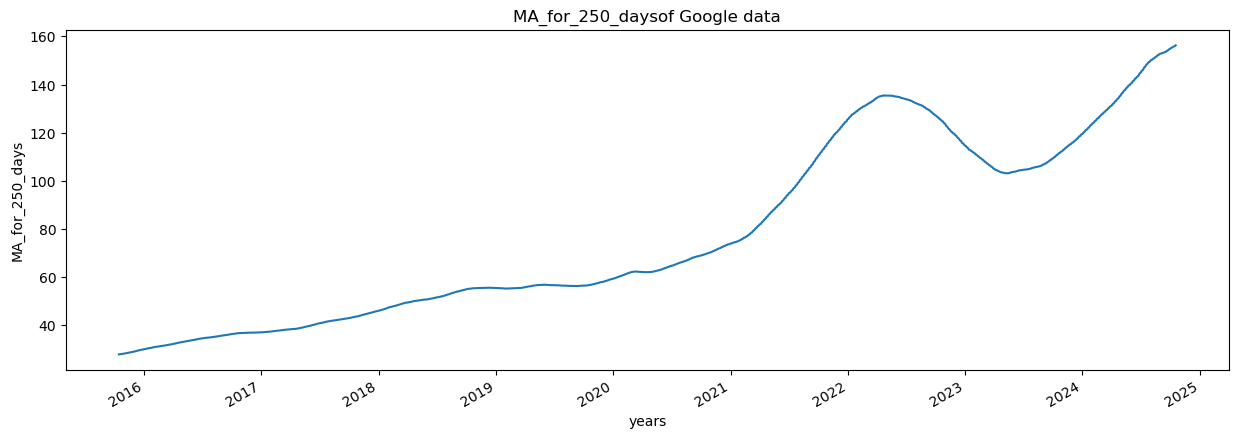

In [21]:
plot_graph((15,5),google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

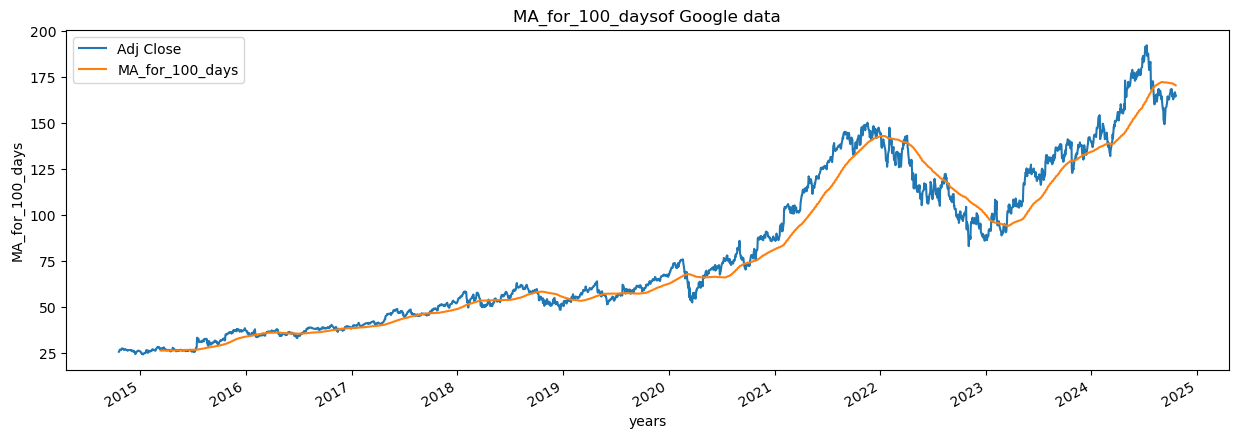

In [29]:
google_data['MA_for_100_days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

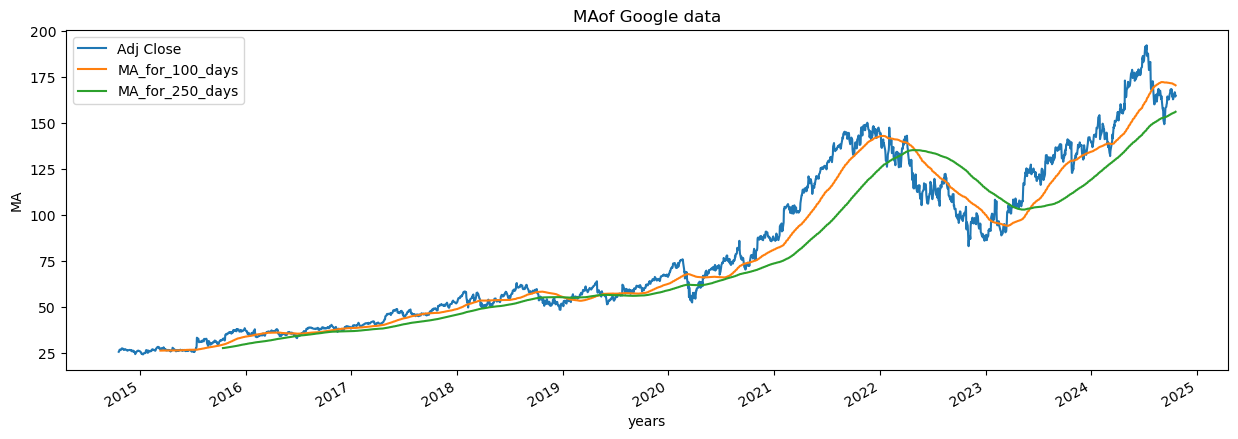

In [30]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

In [31]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-10-20,25.907074,NaN
2014-10-21,26.190598,0.010944
2014-10-22,26.497499,0.011718
2014-10-23,27.058081,0.021156
2014-10-24,26.849169,-0.007721


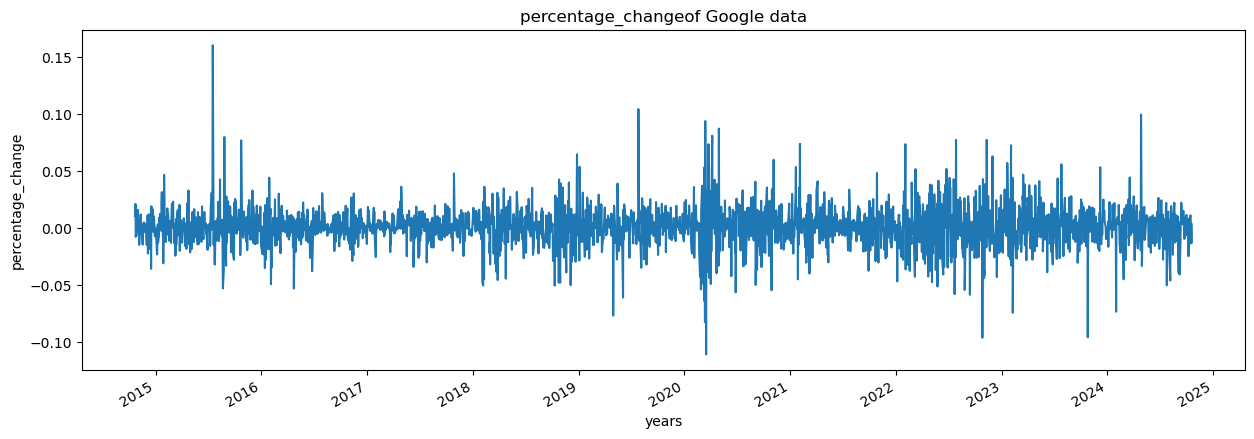

In [32]:
plot_graph((15,5),google_data['percentage_change_cp'], 'percentage_change')

In [33]:
Adj_close_price = google_data[['Adj Close']]

In [34]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([24.49990273]))

In [36]:
!pip install scikit-learn

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00838067],
       [0.01006924],
       [0.01189706],
       ...,
       [0.84713714],
       [0.83385589],
       [0.83707201]])

In [38]:
len(scaled_data)

2517

In [39]:
 x_data = []
 y_data = []

 for i in range(100, len(scaled_data)):
     x_data.append(scaled_data[i-100:i])
     y_data.append(scaled_data[i])
     
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [40]:
 x_data[0],y_data[0]

(array([[0.00838067],
        [0.01006924],
        [0.01189706],
        [0.0152357 ],
        [0.01399149],
        [0.01428477],
        [0.0166932 ],
        [0.01682058],
        [0.01711089],
        [0.01970894],
        [0.01856545],
        [0.01823661],
        [0.0158104 ],
        [0.01466099],
        [0.01435587],
        [0.0162755 ],
        [0.01710497],
        [0.01622218],
        [0.01565044],
        [0.01536011],
        [0.01302277],
        [0.01258433],
        [0.01316498],
        [0.01252508],
        [0.01331605],
        [0.01384038],
        [0.0143766 ],
        [0.01416628],
        [0.01459877],
        [0.01221995],
        [0.01220514],
        [0.01148528],
        [0.01325977],
        [0.00969005],
        [0.0101996 ],
        [0.01209258],
        [0.00992706],
        [0.01060249],
        [0.00773486],
        [0.00629513],
        [0.00084132],
        [0.00365562],
        [0.00549528],
        [0.00705055],
        [0.00957452],
        [0

In [41]:
int(len(x_data)*0.7)

1691

In [42]:
2517-100-int(len(x_data)*0.7)

726

In [43]:
 splitting_len = int(len(x_data)*0.7)
 x_train = x_data[:splitting_len]
 y_train = y_data[:splitting_len]

 x_test = x_data[splitting_len:]
 y_test = y_data[splitting_len:]

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(726, 100, 1)
(726, 1)


In [45]:
!pip install numpy

In [48]:
!pip install keras
!pip install tensorflow

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [53]:
model=Sequential()
model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [58]:
model.fit(x_train, y_train, batch_size=1, epochs =2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - loss: 2.0182e-04
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - loss: 3.2468e-04


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [61]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step


In [62]:
predictions

array([[0.7300944 ],
       [0.72271407],
       [0.71578264],
       [0.719072  ],
       [0.71784526],
       [0.72043234],
       [0.7343432 ],
       [0.7433777 ],
       [0.74447787],
       [0.7452792 ],
       [0.7395215 ],
       [0.7312449 ],
       [0.73483783],
       [0.7306456 ],
       [0.72220725],
       [0.7169329 ],
       [0.7205969 ],
       [0.7315176 ],
       [0.7375545 ],
       [0.7419788 ],
       [0.7384111 ],
       [0.7358637 ],
       [0.73335266],
       [0.7285431 ],
       [0.7276275 ],
       [0.7259421 ],
       [0.7050914 ],
       [0.6934761 ],
       [0.68798536],
       [0.6913737 ],
       [0.69826597],
       [0.706234  ],
       [0.7016521 ],
       [0.69947815],
       [0.68787706],
       [0.6796858 ],
       [0.67015284],
       [0.655801  ],
       [0.6498874 ],
       [0.6374784 ],
       [0.6387264 ],
       [0.6403952 ],
       [0.6534138 ],
       [0.6671455 ],
       [0.67905354],
       [0.71376956],
       [0.7146099 ],
       [0.711

In [63]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[147.08772 ],
       [145.84853 ],
       [144.6847  ],
       [145.23698 ],
       [145.03102 ],
       [145.46541 ],
       [147.80113 ],
       [149.31808 ],
       [149.5028  ],
       [149.63736 ],
       [148.67061 ],
       [147.28091 ],
       [147.88419 ],
       [147.18028 ],
       [145.76343 ],
       [144.87782 ],
       [145.49304 ],
       [147.32669 ],
       [148.34033 ],
       [149.0832  ],
       [148.48416 ],
       [148.05643 ],
       [147.63481 ],
       [146.82726 ],
       [146.67352 ],
       [146.39052 ],
       [142.88956 ],
       [140.93927 ],
       [140.01733 ],
       [140.58626 ],
       [141.74352 ],
       [143.0814  ],
       [142.31207 ],
       [141.94705 ],
       [139.99915 ],
       [138.62378 ],
       [137.02313 ],
       [134.61336 ],
       [133.62042 ],
       [131.53687 ],
       [131.74641 ],
       [132.02663 ],
       [134.21252 ],
       [136.51817 ],
       [138.51762 ],
       [144.34668 ],
       [144.48778 ],
       [143.9

In [66]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[142.10301208],
       [141.27107239],
       [143.42428589],
       [142.17134094],
       [143.44421387],
       [147.67382812],
       [148.3561554 ],
       [147.74316406],
       [148.31077576],
       [146.34510803],
       [144.61535645],
       [147.00747681],
       [144.4836731 ],
       [142.45315552],
       [142.05264282],
       [143.86720276],
       [146.58900452],
       [146.7820282 ],
       [147.70126343],
       [146.0892334 ],
       [146.14559937],
       [145.64482117],
       [144.32507324],
       [144.71908569],
       [144.06271362],
       [137.31628418],
       [137.21403503],
       [136.66886902],
       [138.23452759],
       [139.67448425],
       [141.30097961],
       [138.79016113],
       [139.44404602],
       [135.956604  ],
       [135.31967163],
       [133.17944336],
       [129.77330017],
       [130.05259705],
       [126.42501831],
       [128.92340088],
       [128.80467224],
       [132.96296692],
       [135.36607361],
       [137

In [71]:
rmse = np.sqrt(np.mean( (inv_predictions-inv_y_test)**2))

In [72]:
rmse

3.5306075977442837

In [73]:
ploting_data = pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-11-30,142.103012,147.087723
2021-12-01,141.271072,145.848526
2021-12-02,143.424286,144.684692
2021-12-03,142.171341,145.236984
2021-12-06,143.444214,145.031021


<Figure size 640x480 with 0 Axes>

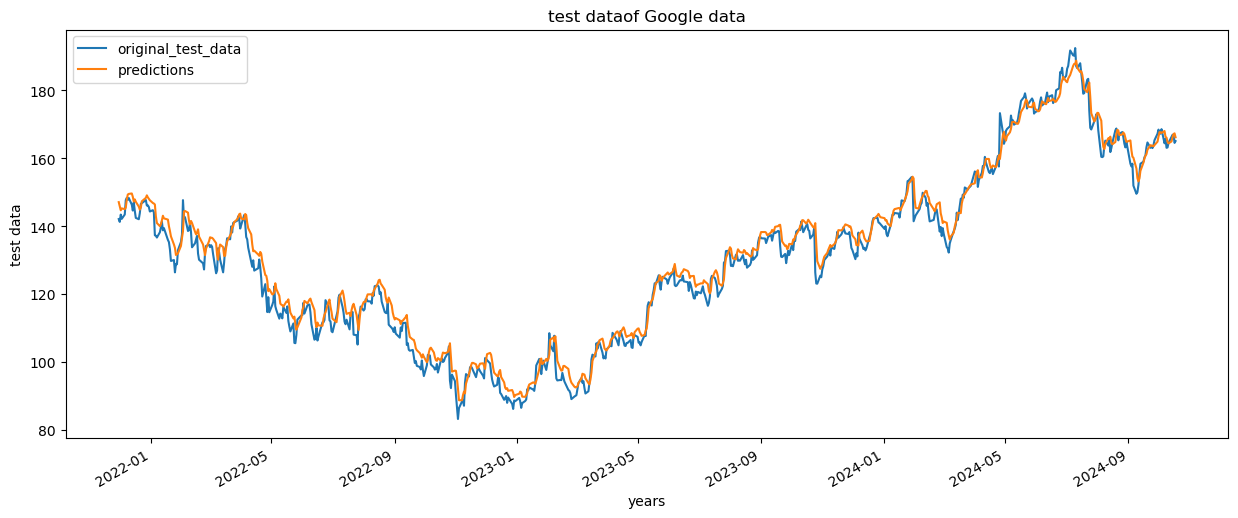

In [74]:
plot_graph((15,6),ploting_data,'test data')

<Figure size 640x480 with 0 Axes>

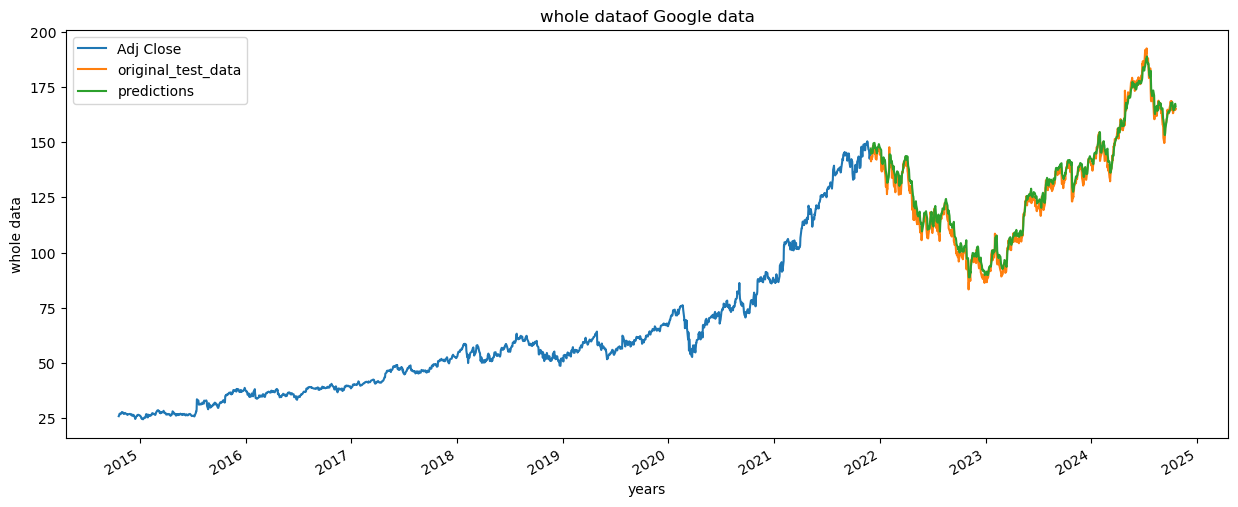

In [79]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'whole data')

In [80]:
model.save("Latest_stock_price_model.keras")